#K-means 集群分析

Clustering的方法大都是非監督式學習(Unsupervised learning)，K-means也是非監督式學習

什麼是非監督式學習? 就是你得到的資料你沒有任何Ground truth，你只有資料本身。

##K-means運作概念圖解:

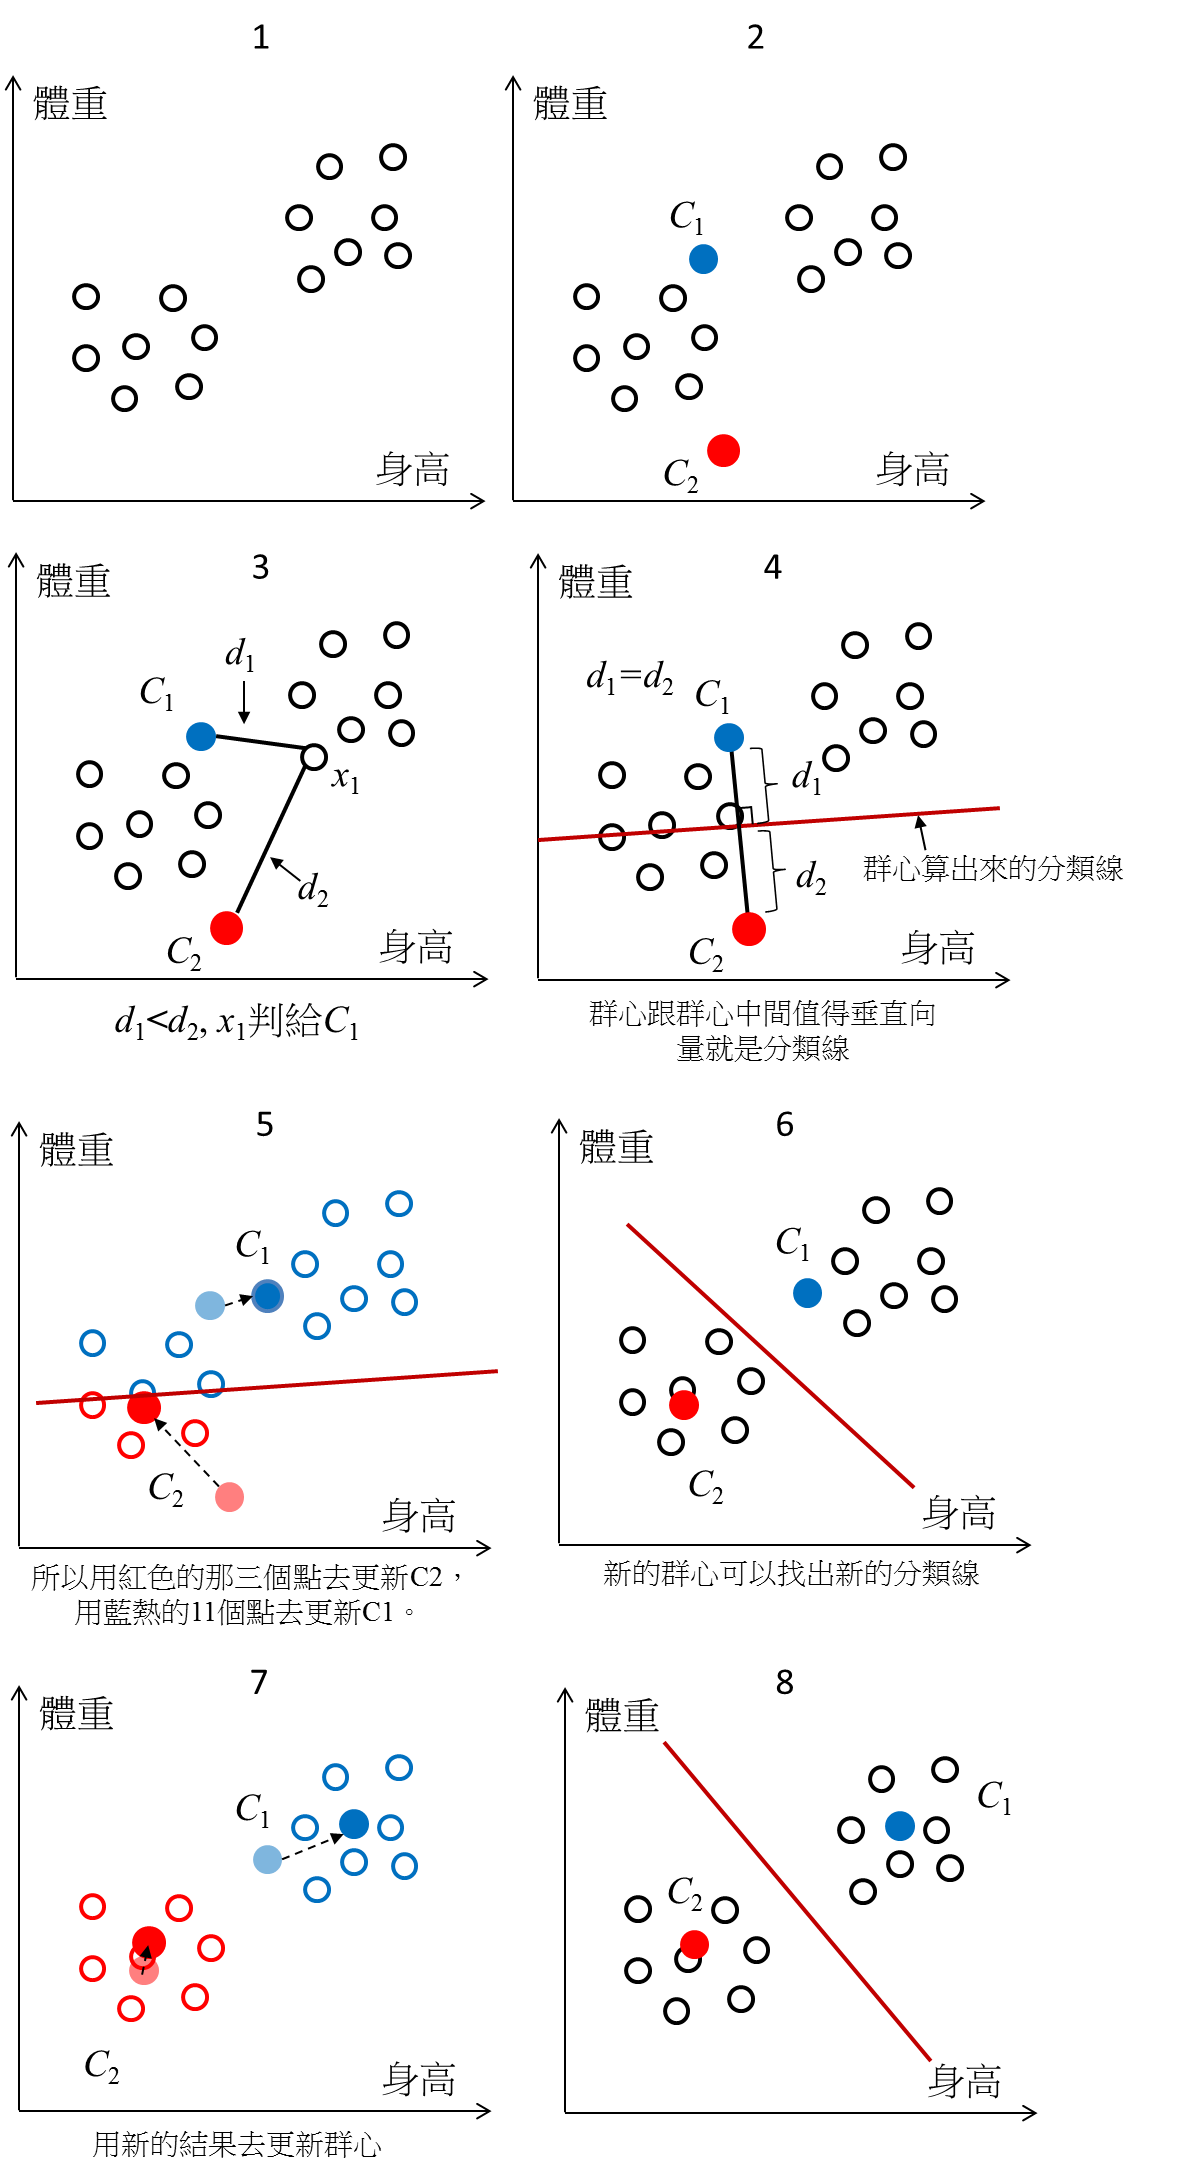

##K-means運作概念步驟:

1. 我們先設定好要分成多少(k)群。

2. 然後在feature space(x軸身高和y軸體重組出來的2維空間，假設資料是d維，則會組出d維空間)隨機給k個群心。

3. 每個資料都會所有k個群心算歐式距離(歐基李德距離Euclidean distance，其實就是直線距離公式，從小學到大的那個距離公式，這邊距離當然也可以換成別種距離公式，但基本上都還是以歐式距離為主)。

4. 將每筆資料分類判給距離最近的那個群心。

5. 每個群心內都會有被分類過來的資料，用這些資料更新一次新的群心。

6. 一直重複3–5，直到所有群心不在有太大的變動(收斂)，結束。

##K-means演算法

1. 初始隨機設定k個群心.

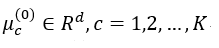

2. 計算分類到每一群體的樣本，(t)為第t次運算

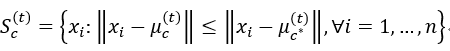

3. 更新群心(nc個資料在第c群內。)

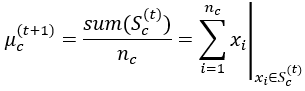

4. 重複2–3，直到群心不變動，也就是

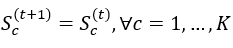


##K-Means Sklearn 套件 

###Parameters:

n_cluster: K的大小，也就是分群的類別數量。

random_state: 亂數種子，設定常數能夠保證每次分群結果都一樣。

n_init: 預設為10次隨機初始化，選擇效果最好的一種來作為模型。

max_iter: 迭代次數，預設為300代。

###Attributes:

inertia_: inertia_：float，每個點到其他叢集的質心的距離之和。

cluster_centers_： 特徵的中心點 [n_clusters, n_features]。

###Methods:

fit: K個集群分類模型訓練。

predict: 預測並回傳類別。

fit_predict: 先呼叫fit()做集群分類，之後在呼叫predict()預測最終類別並回傳輸出。

transform: 回傳的陣列每一行是每一個樣本到kmeans中各個中心點的L2(歐幾里得)距離。

fit_transform: 先呼叫fit()再執行transform()。


##鳶尾花分群

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
import pandas as pd
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
from sklearn.cluster import KMeans

In [4]:
clt = KMeans(n_clusters=3, n_init = 10)
clt.fit_predict(iris_df)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [5]:
clt.inertia_

78.851441426146

In [6]:
from pandas.core.common import random_state
kmeans_list = [KMeans(n_clusters=k,random_state=40).fit(iris_df) for k in range(1,10)]
iner_list = [model.inertia_ for model in kmeans_list]

In [7]:
iner_list

[681.3706,
 152.3479517603579,
 78.851441426146,
 57.22847321428572,
 46.446182051282065,
 39.03998724608726,
 34.40900974025975,
 29.99042640692641,
 28.13688045434099]

In [8]:
import matplotlib.pyplot as plt

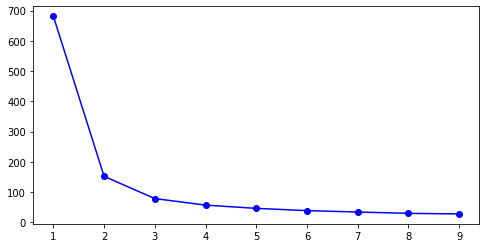

In [9]:
plt.figure(figsize=(8,4))
plt.plot(range(1,10),iner_list,"bo-")
plt.show()